# Staging AGN and Checking Distribution

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
combine_fold = 'C:/Users/oryan/Documents/mergers-in-cosmos/cats-to-combine'
data_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/back-to-basics-data'
fig_folder = 'C:/Users/oryan/Documents/mergers-in-cosmos/paper-source/figures'
cos_dat_fold = 'E:/cosmos-data'

### Importing Data

In [14]:
agn_cat = pd.read_csv(f'{combine_fold}/source-agn-cat.csv', index_col = 0)

In [7]:
df_cat = pd.read_csv(f'{combine_fold}/cosmos2020-categorised-interactions.csv', index_col = 0)

In [19]:
df_cat.head()

,ORyan23_ID,ID,category,ALPHA_J2000,DELTA_J2000,X_IMAGE,Y_IMAGE,ERRX2_IMAGE,ERRY2_IMAGE,ERRXY_IMAGE,...,ez_ssfr_p025,ez_ssfr_p160,ez_ssfr_p500,ez_ssfr_p840,ez_ssfr_p975,ez_Av_p025,ez_Av_p160,ez_Av_p500,ez_Av_p840,ez_Av_p975
0,4000705532455,816891,stage3,150.679846,2.196543,9200.399414,21737.232422,0.000052,0.000059,-0.000010,...,-8.931825,-8.911355,-8.899668,-8.883307,-8.872990,0.529107,0.560142,0.599624,0.630920,0.652330
1,4000705533383,861738,stage1,150.645118,2.237538,10033.689453,22720.843750,0.000039,0.000078,0.000013,...,-9.574272,-9.548649,-9.503962,-9.439343,-9.384205,0.240042,0.281559,0.330791,0.384371,0.436491
2,4000705539529,1284864,stage1,149.686223,2.637412,33027.406250,32317.517578,0.000031,0.000030,0.000001,...,-9.669377,-9.614943,-9.570104,-9.533121,-9.476167,0.094187,0.114436,0.140990,0.159430,0.183608
3,4000705539941,1301188,stage2,149.702462,2.654895,32637.949219,32737.013672,0.000064,0.000104,-0.000003,...,-9.794128,-9.784252,-9.766013,-9.743796,-9.727879,0.018737,0.018737,0.018737,0.018737,0.018737
4,4000705540034,1304538,stage1,149.726828,2.658172,32053.712891,32815.468750,0.000071,0.000086,-0.000006,...,-9.480532,-9.443615,-9.402433,-9.352081,-9.325659,0.302629,0.376027,0.440394,0.508153,0.567727


In [20]:
agn_cat.head()

,ID,agn_clsf
0,574669,SF
1,233386,SF
2,293597,Composite
3,215857,AGN_Liner
4,275163,SF


In [21]:
df_cat.ID.min()

174985

In [25]:
df_cat_red = df_cat[['ORyan23_ID', 'lp_mass_best', 'ez_sfr', 'ID', 'category']]

In [26]:
df_merg = (
    agn_cat
    .merge(df_cat_red, on = 'ID', how = 'left')
)

### The Raw Numbers

In [29]:
print(df_merg.agn_clsf.value_counts())

SFG              1339
AGN               726
HLAGN             141
non-BLAGN         137
MLAGN              94
BLAGN              84
SF                 29
Composite           7
AGN_Non_Liner       4
AGN_Liner           3
Name: agn_clsf, dtype: int64


In [32]:
def agn_class(x):
    if x == 'SFG' or x == 'SF':
        return 'SFG'
    else:
        return 'AGN'

In [33]:
df_agn_simp = (
    df_merg
    .assign(agn = df_merg.agn_clsf.apply(lambda x: agn_class(x)))
)

In [35]:
for i in range(4):
    stage = f'stage{i+1}'
    df_tmp = df_agn_simp.query('category == @stage')
    print(f'Stage {i+1}')
    print(df_tmp.agn.value_counts())
    print(' ')

Stage 1
AGN    265
SFG    251
Name: agn, dtype: int64
 
Stage 2
SFG    385
AGN    327
Name: agn, dtype: int64
 
Stage 3
SFG    299
AGN    237
Name: agn, dtype: int64
 
Stage 4
SFG    433
AGN    367
Name: agn, dtype: int64
 


In [40]:
for i in range(4):
    stage = f'stage{i+1}'
    df_tmp = df_agn_simp.query('category == @stage')
    print(f'Stage {i+1}')
    print(df_tmp.agn.value_counts()['AGN'] / (df_tmp.agn.value_counts().sum()))
    print(' ')

Stage 1
0.5135658914728682
 
Stage 2
0.4592696629213483
 
Stage 3
0.44216417910447764
 
Stage 4
0.45875
 


### Plotting

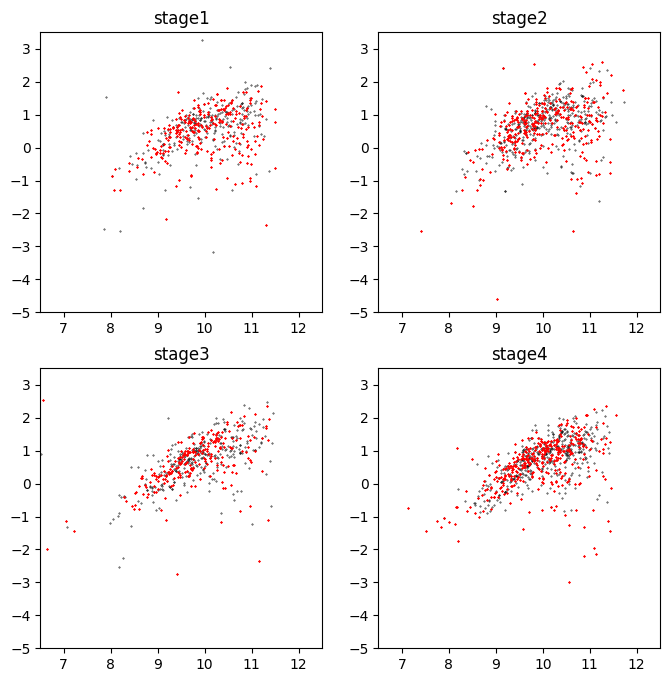

In [50]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_agn_simp.query('category == @stage')
        df_agn = df_stage.query('agn == "AGN"')
        df_sf = df_stage.query('agn == "SFG"')
        
        ax[i,j].scatter(np.array(df_sf.lp_mass_best), np.array(df_sf.ez_sfr), color = 'black', marker = '.', s = 0.5)#, alpha = 0.75)
        ax[i,j].scatter(np.array(df_agn.lp_mass_best), np.array(df_agn.ez_sfr), color = 'red', marker = 'x', s = 0.5)#, alpha = 0.75)
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([6.5, 12.5])
        ax[i,j].set_ylim([-5,3.5])
        
        counter += 1

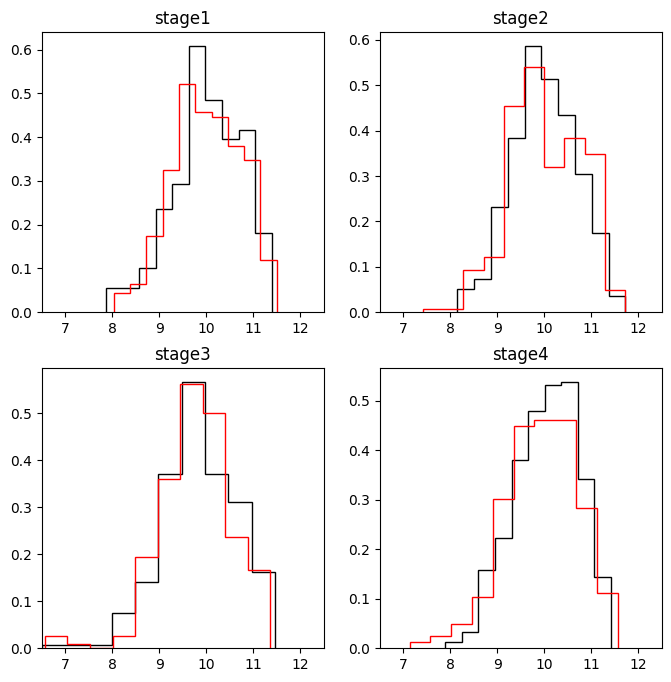

In [54]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_agn_simp.query('category == @stage')
        df_agn = df_stage.query('agn == "AGN"')
        df_sf = df_stage.query('agn == "SFG"')
        
        ax[i,j].hist(np.array(df_sf.lp_mass_best), color = 'black', histtype='step', density = True)#, alpha = 0.75)
        ax[i,j].hist(np.array(df_agn.lp_mass_best), color = 'red', histtype='step', density = True)#, alpha = 0.75)
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([6.5, 12.5])
        
        counter += 1

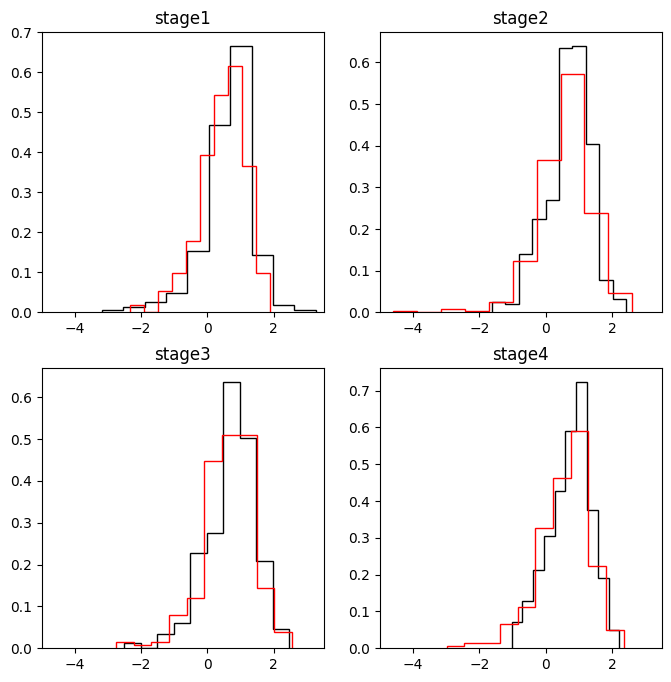

In [56]:
counter = 1
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (8,8))
for i in range(2):
    for j in range(2):
        stage = f'stage{counter}'
        df_stage = df_agn_simp.query('category == @stage')
        df_agn = df_stage.query('agn == "AGN"')
        df_sf = df_stage.query('agn == "SFG"')
        
        ax[i,j].hist(np.array(df_sf.ez_sfr), color = 'black', histtype='step', density = True)#, alpha = 0.75)
        ax[i,j].hist(np.array(df_agn.ez_sfr), color = 'red', histtype='step', density = True)#, alpha = 0.75)
        ax[i,j].set_title(stage)
        ax[i,j].set_xlim([-5, 3.5])
        
        counter += 1

So, galaxies with lower SF gain AGN as we go to higher stages. This is an interesting result! And points to interaction definitively having an impact on AGN, but only as coalescence approaches.